## 第三章 模型搭建和评估-评估

根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

加载下面的库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

**任务：加载数据并分割测试集和训练集**

In [4]:
#写入代码
# 一般先取出X和y后再切割，有些情况会使用到未切割的，这时候X和y就可以用,x是清洗好的数据，y是我们要预测的存活数据'Survived'
data = pd.read_csv('clear_data.csv')
train = pd.read_csv('train.csv')
X = data
y = train['Survived']


In [6]:
#写入代码
from sklearn.model_selection import train_test_split
# 对数据集进行切割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [7]:
#写入代码
# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train, y_train)


D:\ProgramData\Anaconda3\envs\datawhale\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [1]:
#写入代码



### 模型评估

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

【思考】：将上面的概念进一步的理解，大家可以做一下总结

In [34]:
#思考回答：



#### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

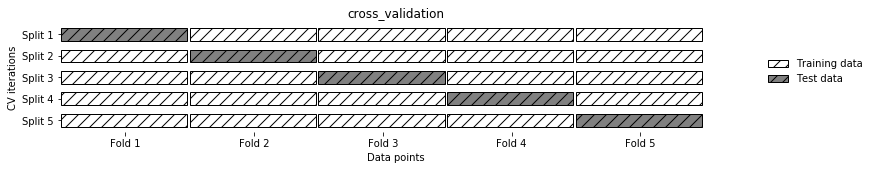

In [6]:
#提示：交叉验证
Image('Snipaste_2020-01-05_16-37-56.png')

#### 提示4
* 交叉验证在sklearn中的模块为`sklearn.model_selection`

In [8]:
#写入代码
from sklearn.model_selection import cross_val_score


In [9]:
#写入代码

lr = LogisticRegression(C=100)
scores = cross_val_score(lr, X_train, y_train, cv=10)

D:\ProgramData\Anaconda3\envs\datawhale\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ProgramData\Anaconda3\envs\datawhale\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

In [10]:
#写入代码
# k折交叉验证分数
scores


array([0.82089552, 0.74626866, 0.74626866, 0.79104478, 0.86567164,
       0.8358209 , 0.76119403, 0.80597015, 0.74242424, 0.75757576])

In [11]:
#写入代码
# 平均交叉验证分数
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Average cross-validation score: 0.79


#### 思考4
* k折越多的情况下会带来什么样的影响？

In [35]:
#思考回答



#### 任务二：混淆矩阵
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的

In [37]:
#思考回答



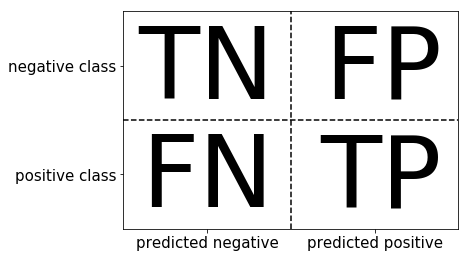

In [40]:
#提示：混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

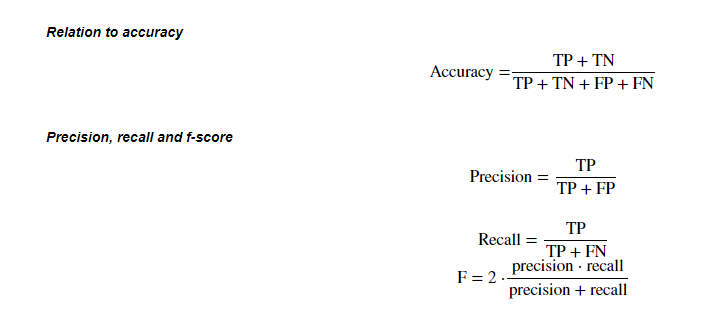

In [42]:
#提示：准确率 (Accuracy),精确度（Precision）,Recall,f-分数计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

#### 提示5
* 混淆矩阵的方法在sklearn中的`sklearn.metrics`模块
* 混淆矩阵需要输入真实标签和预测标签
* 精确率、召回率以及f-分数可使用`classification_report`模块

In [14]:
#写入代码

from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)

D:\ProgramData\Anaconda3\envs\datawhale\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100)

In [15]:
#写入代码
# 模型预测结果
pred = lr.predict(X_train)


In [16]:
#写入代码

# 混淆矩阵
confusion_matrix(y_train, pred)

array([[354,  58],
       [ 83, 173]], dtype=int64)

In [17]:
#写入代码

from sklearn.metrics import classification_report
# 精确率、召回率以及f1-score
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       412
           1       0.75      0.68      0.71       256

    accuracy                           0.79       668
   macro avg       0.78      0.77      0.77       668
weighted avg       0.79      0.79      0.79       668



【思考】
* 如果自己实现混淆矩阵的时候该注意什么问题

In [43]:
#思考回答



#### 任务三：ROC曲线
* 绘制ROC曲线

【思考】什么是ROC曲线，OCR曲线的存在是为了解决什么问题？

In [44]:
#思考


#ROC曲线图是反映敏感性与特异性之间关系的曲线。横坐标X轴为 1 – 特异性，也称为假阳性率（误报率），X轴越接近零准确率越高；纵坐标Y轴称为敏感度，也称为真阳性率（敏感度），Y轴越大代表准确率越好。

#### 提示6
* ROC曲线在sklearn中的模块为`sklearn.metrics`
* ROC曲线下面所包围的面积越大越好

In [18]:
#写入代码
from sklearn.metrics import roc_curve


In [19]:
#写入代码
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [1]:
#写入代码



In [1]:
#写入代码



#### 思考6
* 对于多分类问题如何绘制ROC曲线

In [45]:
#思考回答




【思考】你能从这条OCR曲线的到什么信息？这些信息可以做什么？

In [ ]:
#思考回答

